# Atividade Aula 4

# Sobre o datset

Prever a idade do abalone a partir de medições físicas. A idade do abalone é determinada cortando a concha através do cone, colorindo-a e contando o número de anéis em um microscópio - uma tarefa enfadonha e demorada. Outras medidas, mais fáceis de obter, são utilizadas para prever a idade. 

Dos dados originais, os exemplos com valores ausentes foram removidos (a maioria tendo o valor predito ausente) e os intervalos dos valores contínuos foram escalados para uso com uma ANN (dividindo por 200).

## Informações dos Atributos:

É fornecido o nome do atributo, o tipo de atributo, a unidade de medida e uma breve descrição. O número de toques é o valor a prever: seja como um valor contínuo ou como um problema de classificação.

Nome / Tipo de Dados / Unidade de Medição / Descrição
- Sexo / nominal / - / M, F e I (jovem)
- Comprimento / contínuo / mm / Medição de valva(concha) mais longa
- Diâmetro / contínuo / mm / perpendicular ao comprimento
- Altura / contínua / mm / com carne nas valvas
- Peso total / contínuo / gramas / abalone inteiro
- Peso descascado / contínuo / gramas / peso da carne
- Peso das vísceras / contínuo / gramas / peso intestinal (após sangramento)
- Peso da casca / contínuo / gramas / após secagem
- Rings / integer / - / +1.5 dá a idade em anos

## Fonte:

Os dados vêm de um estudo original (sem aprendizado de máquina):
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn e Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. Rubra_) from the North Coast and Islands of Bass Strait", Divisão de Pesca Marítima, Relatório Técnico nº 48 (ISSN 1034-3288)


## Atribuições do conjunto de dados

Esse conjunto de dados foi obtido de:
Dua, D. e Graff, C. (2019). repositório UCI Machine Learning (https://archive.ics.uci.edu/ml/datasets/abalone). Irvine, CA: University of California, School of Information and Computer Science.

# Etapa 1: Explorando os dados

Vamos iniciar examinando os dados no conjunto de dados (dataset).


Primeiro vamos importar o pandas e definir algumas opções de exibição padrão.

In [59]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Em seguida, carregaremos o conjunto de dados (dataset) em um DataFrame pandas.

Os dados não contêm um cabeçalho, portanto, definiremos esses nomes de coluna em uma variável nomeada `nome_colunas` para os atributos listados na descrição do conjunto de dados (dataset).

In [60]:
data_file='abalone.csv'
nome_colunas =['sexo','comprimento','diametro','altura','peso_total','peso_descascado', 'peso_visceras','peso_casca','anéis']

df_animal = pd.read_csv(data_file,',',names = nome_colunas ,na_values="?",  header=None)

Primeiro, para ver o número de linhas (instâncias) e colunas (componentes (features)), usaremos o método `shape`.

In [61]:
df_animal.shape

(4177, 9)

In [62]:
df_animal.head(5)

,sexo,comprimento,diametro,altura,peso_total,peso_descascado,peso_visceras,peso_casca,anéis
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Etapa 2: Preparação dos dados

In [63]:
df_animal['sexo'].value_counts()

M    1528
I    1342
F    1307
Name: sexo, dtype: int64

Vamos alterar o sexo para **Macho = 1** e **não Macho para = 0**

In [64]:
sexo_mapper = {"M": 1,
                "F": 0,
                "I": 0
               }

In [65]:
df_animal['sexo'] = df_animal["sexo"].replace(sexo_mapper)

In [66]:
df_animal['sexo'].value_counts()

0    2649
1    1528
Name: sexo, dtype: int64

In [67]:
df_animal.head(5)

,sexo,comprimento,diametro,altura,peso_total,peso_descascado,peso_visceras,peso_casca,anéis
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Também vamos alterar os **anéis** dividindo por **100**

In [68]:
df_animal['anéis'] = df_animal['anéis'].div(100).round(2)

In [69]:
df_animal.head(5)

,sexo,comprimento,diametro,altura,peso_total,peso_descascado,peso_visceras,peso_casca,anéis
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.07
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.09
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.07


## Divisão de dados

Iremos dividir o conjunto de dados em dois. Usaremos um conjunto de dados para treinamento e dividiremos o outro novamente para uso com validação e teste.

In [70]:
from sklearn.model_selection import train_test_split
train, test_and_validate = train_test_split(df_animal, test_size=0.2, random_state=30, stratify=df_animal['sexo'])

Em seguida, dividimos o conjunto de dados *test_and_validate* em duas partes iguais.

In [71]:
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=30, stratify=test_and_validate['sexo'])

Os três conjuntos de dados.

In [72]:
print(train.shape)
print(test.shape)
print(validate.shape)

(3341, 9)
(418, 9)
(418, 9)


Distribuição:

In [73]:
print(train['sexo'].value_counts())
print(test['sexo'].value_counts())
print(validate['sexo'].value_counts())

0    2119
1    1222
Name: sexo, dtype: int64
0    265
1    153
Name: sexo, dtype: int64
0    265
1    153
Name: sexo, dtype: int64


## Criando o bucket e Fazendo upload para o S3

In [30]:
import os
import boto3
import io

bucket='lscheiner-lab-python'

prefix='lab4'

train_file='abalone_train.csv'
test_file='abalone_test.csv'
validate_file='abalone_validate.csv'

# cria o bucket
s3 = boto3.client("s3")
s3.create_bucket(Bucket=bucket) 

s3_resource = boto3.Session().resource('s3')
def upload_s3_csv(filename, folder, dataframe):
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False)
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

Fazendo upload:

In [31]:
upload_s3_csv(train_file, 'train', train)
upload_s3_csv(test_file, 'test', test)
upload_s3_csv(validate_file, 'validate', validate)

# Etapa 3: Treinar o modelo


Obter o URI do contêiner XGBoost.

In [40]:
from sagemaker.image_uris import retrieve
container = retrieve('xgboost',boto3.Session().region_name,'1.0-1')

Definindo valores padrão.

In [41]:
hyperparams={"num_round":"30",
             "eval_metric": "auc",
             "objective": "binary:logistic"}

In [42]:
import sagemaker
s3_output_location="s3://{}/{}/output/".format(bucket,prefix)
train_instance_count = 1
train_instance_type = 'ml.m4.xlarge'

xgb_model=sagemaker.estimator.Estimator(container,
                                       sagemaker.get_execution_role(),
                                       instance_count=train_instance_count,
                                       instance_type=train_instance_type,
                                       output_path=s3_output_location,
                                        hyperparameters=hyperparams,
                                        sagemaker_session=sagemaker.Session())

Para treinamento, *train_channel* e *validate_channel* serão usados.

In [43]:
train_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/train/".format(bucket,prefix,train_file),
    content_type='text/csv')

validate_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/validate/".format(bucket,prefix,validate_file),
    content_type='text/csv')

data_channels = {'train': train_channel, 'validation': validate_channel}

Iniciar o treinamento.

In [44]:
xgb_model.fit(inputs=data_channels, logs=False)


2021-12-19 03:29:08 Starting - Starting the training job
2021-12-19 03:29:11 Starting - Launching requested ML instances............
2021-12-19 03:30:18 Starting - Preparing the instances for training...................
2021-12-19 03:31:57 Downloading - Downloading input data.
2021-12-19 03:32:09 Training - Downloading the training image.......
2021-12-19 03:32:49 Training - Training image download completed. Training in progress........
2021-12-19 03:33:26 Uploading - Uploading generated training model
2021-12-19 03:33:35 Completed - Training job completed


# Etapa 4: Hospedagem do modelo

In [ ]:
xgb_predictor = xgb_model.deploy(initial_instance_count=1,
                serializer = sagemaker.serializers.CSVSerializer(),
                instance_type='ml.m4.xlarge')

------

# Etapa 5: Executar predições

Agora que temos um modelo implantado, executaremos algumas predições.

Dados de teste:

In [75]:
test.head(5)

,sexo,comprimento,diametro,altura,peso_total,peso_descascado,peso_visceras,peso_casca,anéis
291,0,0.565,0.505,0.210,1.2765,0.5010,0.2790,0.3550,0.12
4025,0,0.330,0.260,0.085,0.1965,0.0915,0.0425,0.0550,0.07
2870,0,0.370,0.270,0.090,0.1855,0.0700,0.0425,0.0650,0.07
919,0,0.410,0.310,0.090,0.3335,0.1635,0.0610,0.0910,0.06
1137,0,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,0.10


Removendo a primeira coluna para test:

In [76]:
row = test.iloc[:1,1:]
row.head()

,comprimento,diametro,altura,peso_total,peso_descascado,peso_visceras,peso_casca,anéis
291,0.565,0.505,0.21,1.2765,0.501,0.279,0.355,0.12


Convertendo em CSV

In [77]:
batch_X_csv_buffer = io.StringIO()
row.to_csv(batch_X_csv_buffer, header=False, index=False)
test_row = batch_X_csv_buffer.getvalue()
print(test_row)

0.565,0.505,0.21,1.2765,0.501,0.27899999999999997,0.355,0.12



Executando uma predição.

In [78]:
xgb_predictor.predict(test_row)

b'0.6691997647285461'

Chance de **66%** de ser macho.

# Etapa 6: Encerrar o modelo implantado

In [80]:
xgb_predictor.delete_endpoint(delete_endpoint_config=True)

# Etapa 7: Realizar uma transformação em lote (batch)


In [81]:
batch_X = test.iloc[:,1:];
batch_X.head()

,comprimento,diametro,altura,peso_total,peso_descascado,peso_visceras,peso_casca,anéis
291,0.565,0.505,0.210,1.2765,0.5010,0.2790,0.3550,0.12
4025,0.330,0.260,0.085,0.1965,0.0915,0.0425,0.0550,0.07
2870,0.370,0.270,0.090,0.1855,0.0700,0.0425,0.0650,0.07
919,0.410,0.310,0.090,0.3335,0.1635,0.0610,0.0910,0.06
1137,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,0.10


Gravando os dados em um arquivo CSV no S3.

In [82]:
batch_X_file='batch-in.csv'
upload_s3_csv(batch_X_file, 'batch-in', batch_X)

Configurando o transformer

In [83]:
batch_output = "s3://{}/{}/batch-out/".format(bucket,prefix)
batch_input = "s3://{}/{}/batch-in/{}".format(bucket,prefix,batch_X_file)

xgb_transformer = xgb_model.transformer(instance_count=1,
                                       instance_type='ml.m4.xlarge',
                                       strategy='MultiRecord',
                                       assemble_with='Line',
                                       output_path=batch_output)

xgb_transformer.transform(data=batch_input,
                         data_type='S3Prefix',
                         content_type='text/csv',
                         split_type='Line')
xgb_transformer.wait()

.................................
[2021-12-19:04:00:21:INFO] No GPUs detected (normal if no gpus installed)
[2021-12-19:04:00:21:INFO] No GPUs detected (normal if no gpus installed)
[2021-12-19:04:00:21:INFO] No GPUs detected (normal if no gpus installed)
[2021-12-19:04:00:21:INFO] No GPUs detected (normal if no gpus installed)
[2021-12-19:04:00:21:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
[2021-12-19:04:00:21:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocat

Fazendo download da saída do S3

In [84]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
target_predicted = pd.read_csv(io.BytesIO(obj['Body'].read()),',',names=['sexo'])
target_predicted.head(5)

,sexo
0,0.669200
1,0.164219
2,0.065405
3,0.022768
4,0.619789


Analisando as saídas, usando um threshold de 0.65:

In [107]:
def converte_binario(x):
    threshold = 0.75
    if x > threshold:
        return 1
    else:
        return 0

target_predicted['binario'] = target_predicted['sexo'].apply(converte_binario)

print(target_predicted.head(10))
test.head(10)

       sexo  binario
0  0.669200        0
1  0.164219        0
2  0.065405        0
3  0.022768        0
4  0.619789        0
5  0.427557        0
6  0.158237        0
7  0.443840        0
8  0.505827        0
9  0.801332        1


,sexo,comprimento,diametro,altura,peso_total,peso_descascado,peso_visceras,peso_casca,anéis
291,0,0.565,0.505,0.210,1.2765,0.5010,0.2790,0.3550,0.12
4025,0,0.330,0.260,0.085,0.1965,0.0915,0.0425,0.0550,0.07
2870,0,0.370,0.270,0.090,0.1855,0.0700,0.0425,0.0650,0.07
919,0,0.410,0.310,0.090,0.3335,0.1635,0.0610,0.0910,0.06
1137,0,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,0.10
1496,1,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,0.09
2341,0,0.310,0.240,0.090,0.1455,0.0605,0.0315,0.0450,0.07
1676,1,0.615,0.470,0.160,1.0175,0.4730,0.2395,0.2800,0.10
1650,0,0.590,0.460,0.145,0.9015,0.4190,0.1785,0.2600,0.11
2704,1,0.700,0.525,0.175,1.7585,0.8745,0.3615,0.4700,0.10


Analisando as 10 primeiras linhas tivemos dois erros: **linha 6 = 0.427557**  e **linha 8 = 0.443840** era pra ser macho mas ele não considerou

# Etapa 8: Criando de uma matriz de confusão (confusion matrix)

In [100]:
test_labels = test.iloc[:,0]
test_labels.head()

291     0
4025    0
2870    0
919     0
1137    0
Name: sexo, dtype: int64

Criando a matriz de confusão

In [101]:
from sklearn.metrics import confusion_matrix

target_predicted_binario = target_predicted['sexo'].apply(converte_binario)

matrix = confusion_matrix(test_labels,target_predicted_binario)
df_confusion = pd.DataFrame(matrix, index=['Macho','Não Macho'],columns=['Macho','Não Macho'])

df_confusion

,Macho,Não Macho
Macho,262,3
Não Macho,143,10


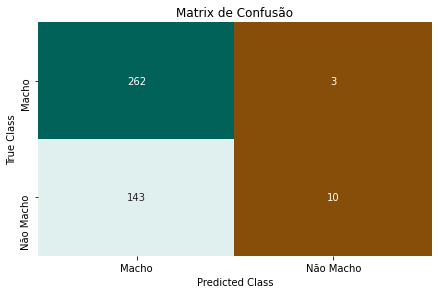

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

mapa_colorido = sns.color_palette("BrBG", 10)
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=mapa_colorido, fmt='.3g')
plt.title("Matrix de Confusão")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

O modelo previu corretamente os valores **262 Macho** e **10 Não Macho**.\
No entanto, ele previu incorretamente os valores **143 Macho** e **3 Não Macho**. 


# Etapa 9: Cálculo dos dados estatísticos de desempenho

Extrair os valores das células da matriz de confusão (confusion matrix) em variáveis.

In [112]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted_binario).ravel()

print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP) : {TP}")

True Negative (TN) : 262
False Positive (FP): 3
False Negative (FN): 143
True Positive (TP) : 10


### Sensibilidade

In [113]:
# Sensibilidade, taxa de acerto, recall ou taxa de verdadeiro positivo
sensibilidade  = float(TP)/(TP+FN)*100
print(f"Sensibilidade ou TPR: {sensibilidade}%")  
print(f"Há {sensibilidade}% de chance do modelo detectar machos.")

Sensibilidade ou TPR: 6.535947712418301%
Há 6.535947712418301% de chance do modelo detectar machos.


**Muito baixo o percentual**

### Especificidade

In [114]:
# Especificidade ou true negative rate
especificidade  = float(TN)/(TN+FP)*100
print(f"Especificidade or TNR: {especificidade}%") 
print(f"Há {especificidade}% chance do modelo detectar não macho.")

Especificidade or TNR: 98.86792452830188%
Há 98.86792452830188% chance do modelo detectar não macho.


### Valores preditivos positivos e negativos


In [116]:
# Precisão or positive predictive value
precisao = float(TP)/(TP+FP)*100
print(f"Precisão: {precisao}%")  
print(f"Você tem um macho e a probabilidade de estar correta é {precisao}%")

Precisão: 76.92307692307693%
Você tem um macho e a probabilidade de estar correta é 76.92307692307693%


O *valor preditivo negativo*

In [118]:
# Valor preditivo negativo
NPV = float(TN)/(TN+FN)*100
print(f"Valor preditivo negativo: {NPV}%") 

Valor preditivo negativo: 64.69135802469135%


### Taxa de falsos positivos (false positive rate)

In [119]:
# Falsos positivos
FPR = float(FP)/(FP+TN)*100
print( f"Taxa de Falso positivo: {FPR}%") 

Taxa de Falso positivo: 1.1320754716981132%


### Taxa de falsos negativos


In [121]:
# Falsos negativo
FNR = float(FN)/(TP+FN)*100
print(f"Taxa de Falso negativo: {FNR}%") 

Taxa de Falso negativo: 93.4640522875817%


### Taxa de descobertas falsas (False discovery rate)


In [123]:
# Taxa de descoberta falsa
FDR = float(FP)/(TP+FP)*100
print(f"Taxa de descoberta falsa: {FDR}%" )

Taxa de descoberta falsa: 23.076923076923077%


### Precisão geral

In [124]:
# Precisão geral
ACC = float(TP+TN)/(TP+FP+FN+TN)*100
print(f"Acuracidade: {ACC}%") 

Acuracidade: 65.07177033492823%


Resumo:

In [126]:
print(f"Sensibilidade ou TPR: {sensibilidade}%")     
print(f"Especificidade or TNR: {especificidade}%") 
print(f"Precisão: {precisao}%")   
print(f"Valor preditivo negativo: {NPV}%")  
print(f"Taxa de Falso positivo: {FPR}%") 
print(f"Taxa de Falso negativo: {FNR}%")  
print(f"Taxa de descoberta falsa: {FDR}%" )
print(f"Acuracidade: {ACC}%") 

Sensibilidade ou TPR: 6.535947712418301%
Especificidade or TNR: 98.86792452830188%
Precisão: 76.92307692307693%
Valor preditivo negativo: 64.69135802469135%
Taxa de Falso positivo: 1.1320754716981132%
Taxa de Falso negativo: 93.4640522875817%
Taxa de descoberta falsa: 23.076923076923077%
Acuracidade: 65.07177033492823%


# Etapa 10: Cálculo do AUC-ROC

In [109]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
target_predicted = pd.read_csv(io.BytesIO(obj['Body'].read()),',',names=['sexo'])

test_labels = test.iloc[:,0];

print(test_labels)
target_predicted.head(5)

291     0
4025    0
2870    0
919     0
1137    0
1496    1
2341    0
1676    1
1650    0
2704    1
298     1
1405    1
2848    0
4019    1
346     0
1579    0
1644    1
1043    1
63      1
3574    0
688     1
3745    0
1135    0
705     1
2056    0
879     0
1614    0
3291    1
4110    1
4060    0
3952    0
984     1
115     0
2643    0
2999    0
1113    0
3618    1
734     1
2880    0
611     1
1251    0
121     0
108     0
3623    1
786     0
3614    1
1559    0
1276    0
4145    1
2200    0
266     1
271     1
337     1
4121    0
693     1
1382    0
2702    1
132     0
1421    0
1760    0
3502    1
1513    1
3733    1
3166    0
3964    0
2468    0
1965    1
971     1
345     1
3249    1
1240    0
1892    1
157     1
3408    0
1440    0
3918    0
3973    0
3625    0
885     0
3792    0
908     0
2242    0
3397    0
1008    1
652     0
893     0
945     1
1686    1
1935    1
1053    0
1165    0
1728    1
1646    0
77      0
944     0
3372    0
3674    0
3796    0
1629    0
75      0


,sexo
0,0.669200
1,0.164219
2,0.065405
3,0.022768
4,0.619789


In [127]:
print("Validação AUC", roc_auc_score(test_labels, target_predicted) )

Validação AUC 0.6887532371439141


Figure(432x288)


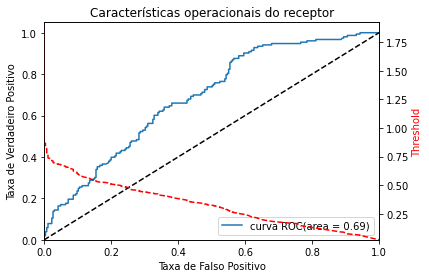

<Figure size 432x288 with 0 Axes>

In [128]:
fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='curva ROC(area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Características operacionais do receptor')
plt.legend(loc="lower right")
 
# cria os eixos com os thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])

print(plt.figure())